In [21]:
import pandas as pd
from google.colab import files
uploaded = files.upload()
df = pd.read_csv("Sleep_dataset.csv")
print(df)

Saving Sleep_dataset.csv to Sleep_dataset (1).csv
     Person ID  Gender  Age            Occupation  Sleep Duration  \
0            1    Male   27     Software Engineer             6.1   
1            2    Male   28                Doctor             6.2   
2            3    Male   28                Doctor             6.2   
3            4    Male   28  Sales Representative             5.9   
4            5    Male   28  Sales Representative             5.9   
..         ...     ...  ...                   ...             ...   
369        370  Female   59                 Nurse             8.1   
370        371  Female   59                 Nurse             8.0   
371        372  Female   59                 Nurse             8.1   
372        373  Female   59                 Nurse             8.1   
373        374  Female   59                 Nurse             8.1   

     Quality of Sleep  Physical Activity Level  Stress Level BMI Category  \
0                   6                       

In [22]:
df =df.drop(["Daily Steps", "Person ID", "Occupation", "Heart Rate"], axis = 1)

In [23]:
print(df)

     Gender  Age  Sleep Duration  Quality of Sleep  Physical Activity Level  \
0      Male   27             6.1                 6                       42   
1      Male   28             6.2                 6                       60   
2      Male   28             6.2                 6                       60   
3      Male   28             5.9                 4                       30   
4      Male   28             5.9                 4                       30   
..      ...  ...             ...               ...                      ...   
369  Female   59             8.1                 9                       75   
370  Female   59             8.0                 9                       75   
371  Female   59             8.1                 9                       75   
372  Female   59             8.1                 9                       75   
373  Female   59             8.1                 9                       75   

     Stress Level BMI Category Blood Pressure Sleep

In [24]:
import statistics
import math
import numpy as np
import matplotlib.pyplot as plt



In [25]:
df = df.replace("Normal Weight", "Normal")

In [26]:
print(df["BMI Category"].head(20))

0     Overweight
1         Normal
2         Normal
3          Obese
4          Obese
5          Obese
6          Obese
7         Normal
8         Normal
9         Normal
10        Normal
11        Normal
12        Normal
13        Normal
14        Normal
15        Normal
16        Normal
17        Normal
18        Normal
19        Normal
Name: BMI Category, dtype: object


In [27]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [28]:
df["BMI Category"] = le.fit_transform(df["BMI Category"])


In [29]:
print(df['BMI Category'])
#Normal = 0, Obese = 1, Overweight = 2

0      2
1      0
2      0
3      1
4      1
      ..
369    2
370    2
371    2
372    2
373    2
Name: BMI Category, Length: 374, dtype: int64


In [30]:
df['Sleep Disorder'] = le.fit_transform(df['Sleep Disorder'])

In [31]:
new = df['Blood Pressure'].str.split("/", n =1, expand = True)
print(new)
print(df)

media = []
for i in range(0, 374):
  media.append((int(new[0][i]) + int(new[1][i]))/2)

       0   1
0    126  83
1    125  80
2    125  80
3    140  90
4    140  90
..   ...  ..
369  140  95
370  140  95
371  140  95
372  140  95
373  140  95

[374 rows x 2 columns]
     Gender  Age  Sleep Duration  Quality of Sleep  Physical Activity Level  \
0      Male   27             6.1                 6                       42   
1      Male   28             6.2                 6                       60   
2      Male   28             6.2                 6                       60   
3      Male   28             5.9                 4                       30   
4      Male   28             5.9                 4                       30   
..      ...  ...             ...               ...                      ...   
369  Female   59             8.1                 9                       75   
370  Female   59             8.0                 9                       75   
371  Female   59             8.1                 9                       75   
372  Female   59             8

In [32]:
print(media)
df["BloodPressure"] = media

[104.5, 102.5, 102.5, 115.0, 115.0, 115.0, 115.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 109.5, 100.0, 109.5, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 108.0, 108.0, 96.5, 102.5, 100.0, 102.5, 102.5, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 102.5, 100.0, 102.5, 102.5, 100.0, 102.5, 102.5, 100.0, 102.5, 102.5, 102.5, 102.5, 102.5, 102.5, 97.0, 102.5, 106.5, 106.5, 102.5, 102.5, 102.5, 102.5, 102.5, 102.5, 102.5, 102.5, 102.5, 102.5, 108.5, 108.5, 106.0, 106.0, 100.0, 95.0, 102.5, 102.5, 102.5, 102.5, 102.5, 102.5, 100.0, 111.5, 95.0, 95.0, 95.0, 95.0, 95.0, 95.0, 95.0, 95.0, 95.0, 106.5, 95.0, 106.5, 104.5, 100.0, 100.0, 107.5, 95.0, 107.5, 95.0, 107.5, 95.0, 95.0, 95.0, 95.0, 95.0, 95.0, 95.0, 95.0, 95.0, 95.0, 95.0, 100.0, 107.5, 95.0, 107.5, 107.5, 95.0, 107.5, 107.5, 95.0, 107.5, 107.5, 95.0, 107.5, 95.0, 107.5, 95.0, 107.5, 95.0, 95.0, 107.5, 111.5, 107.5, 109.

In [33]:
df.drop(["Blood Pressure"], axis = 1, inplace= True)

In [34]:
print(df)

     Gender  Age  Sleep Duration  Quality of Sleep  Physical Activity Level  \
0      Male   27             6.1                 6                       42   
1      Male   28             6.2                 6                       60   
2      Male   28             6.2                 6                       60   
3      Male   28             5.9                 4                       30   
4      Male   28             5.9                 4                       30   
..      ...  ...             ...               ...                      ...   
369  Female   59             8.1                 9                       75   
370  Female   59             8.0                 9                       75   
371  Female   59             8.1                 9                       75   
372  Female   59             8.1                 9                       75   
373  Female   59             8.1                 9                       75   

     Stress Level  BMI Category  Sleep Disorder  Bl

In [35]:
df.drop("Gender", axis = 1, inplace = True)

In [36]:
df.head()

,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Sleep Disorder,BloodPressure
0,27,6.1,6,42,6,2,1,104.5
1,28,6.2,6,60,8,0,1,102.5
2,28,6.2,6,60,8,0,1,102.5
3,28,5.9,4,30,8,1,2,115.0
4,28,5.9,4,30,8,1,2,115.0


In [40]:
from os import X_OK
x = df[["Sleep Duration", "Physical Activity Level", "Stress Level", "BMI Category", 'Sleep Disorder', 'BloodPressure']]
y = df["Quality of Sleep"]
from sklearn.model_selection import train_test_split
X_OK_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [44]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=4)
clf = clf.fit(X_OK_train, y_train)
predictions = clf.predict(X_test)

In [45]:
print("\nMatriz de confusão:\n",
      pd.crosstab(y_test, predictions, rownames=['Real'], colnames=['Predito'],
      margins=True, margins_name='Todos'))


Matriz de confusão:
 Predito  4  5   6   7   8   9  Todos
Real                                
4        2  0   0   0   0   0      2
5        0  1   2   0   0   0      3
6        0  0  29   0   0   0     29
7        0  0   2  20   0   0     22
8        0  0   0   0  38   0     38
9        0  0   0   0   0  19     19
Todos    2  1  33  20  38  19    113


In [48]:
import sklearn.metrics as metrics
print("Relatório sobre a qualidade:\n")
print(metrics.classification_report(y_test, predictions ))

Relatório sobre a qualidade:

              precision    recall  f1-score   support

           4       1.00      1.00      1.00         2
           5       1.00      0.33      0.50         3
           6       0.88      1.00      0.94        29
           7       1.00      0.91      0.95        22
           8       1.00      1.00      1.00        38
           9       1.00      1.00      1.00        19

    accuracy                           0.96       113
   macro avg       0.98      0.87      0.90       113
weighted avg       0.97      0.96      0.96       113



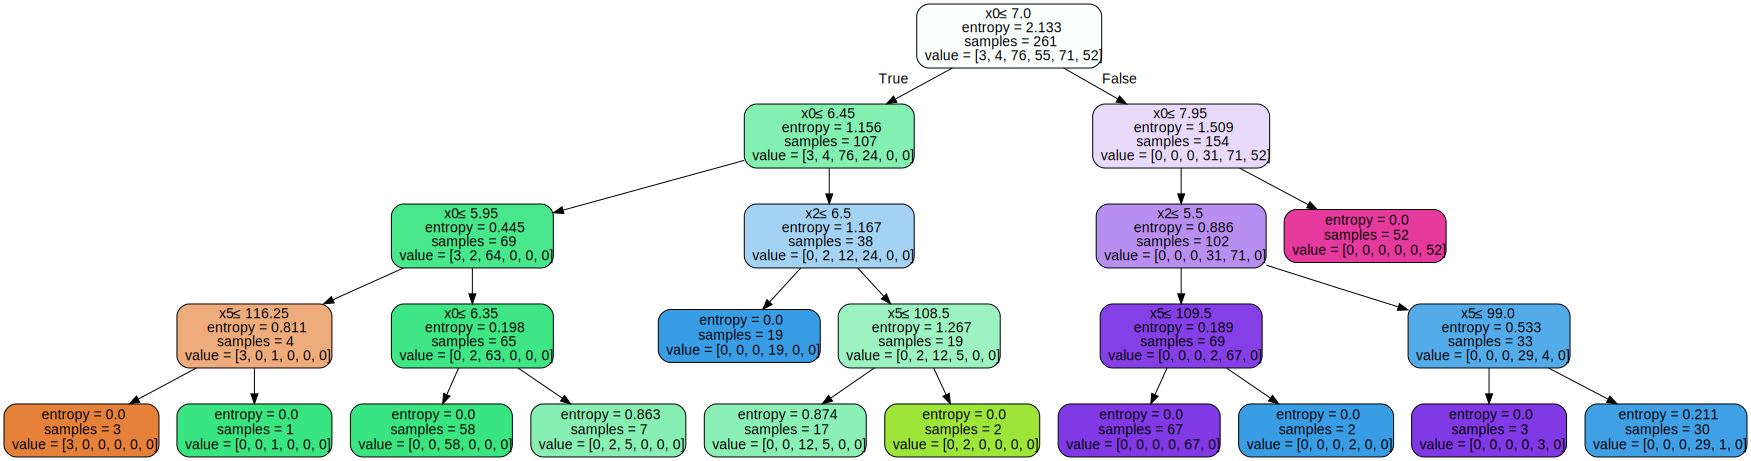

In [52]:
import graphviz
dot_data = tree.export_graphviz(clf, out_file=None)
graph = graphviz.Source(dot_data)
graph.render("df")
dot_data = tree.export_graphviz(clf, out_file=None,
                         filled=True, rounded=True,
                         special_characters=True)
graph = graphviz.Source(dot_data, format="png")
graph